# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [1]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
X= pd.read_csv('../data/3D_spatial_network.csv')
X = X.drop(['osm'], axis=1).sample(20000)
X.head()

,lat,lon,alt
101921,8.884733,57.074968,12.761273
105722,9.501151,56.618347,36.349233
115070,10.397148,57.583213,4.934445
162484,9.853012,57.485098,26.427404
154551,10.054684,56.952023,7.721160


<IPython.core.display.Javascript object>


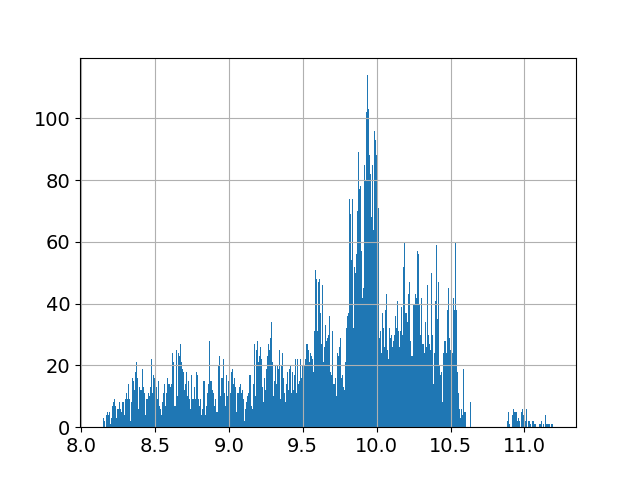

In [10]:
fig = plt.figure()
X.lat.hist(bins=1000)

In [11]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

<IPython.core.display.Javascript object>


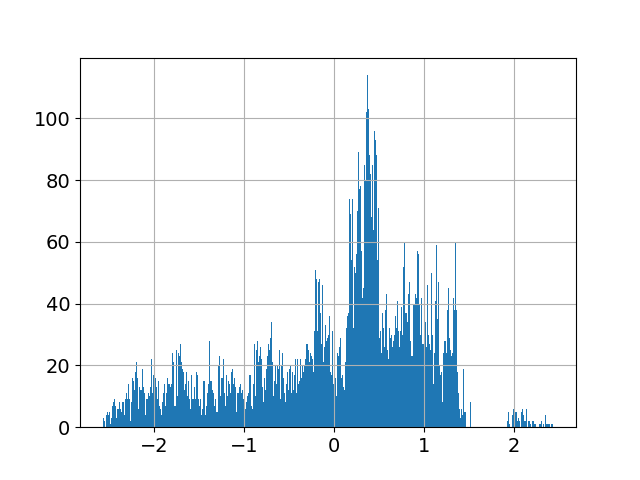

In [12]:
fig = plt.figure()
XX.lat.hist(bins=1000)

<IPython.core.display.Javascript object>


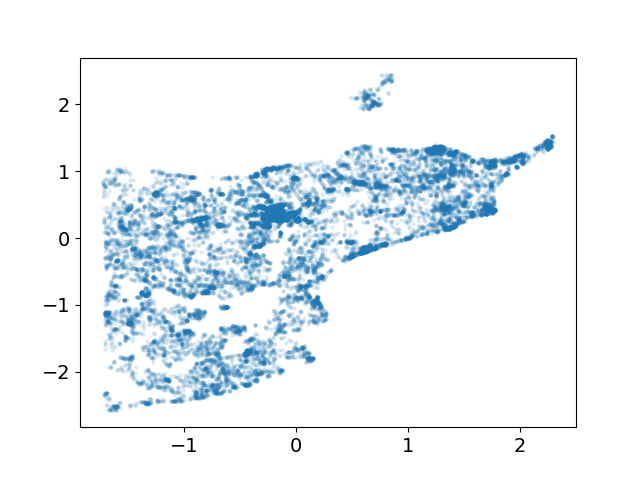

In [13]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, )

In [20]:
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)
km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['lon', 'lat', 'alt']])

In [22]:
XX

,lat,lon,alt,cluster
101921,-1.359060,-0.019020,-0.522747,1
105722,-0.344782,-1.605500,0.734453,0
115070,1.129525,1.746826,-0.939904,6
162484,0.234183,1.405935,0.205636,2
154551,0.566021,-0.446179,-0.791376,4
41353,-1.820722,-1.193662,-0.628714,3
70401,0.393099,-0.131222,-0.825785,4
147399,-1.554915,-1.242412,-0.011864,3
46394,0.796073,-1.616820,0.981901,0
107206,-1.092747,-1.049399,-0.201780,1


In [36]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


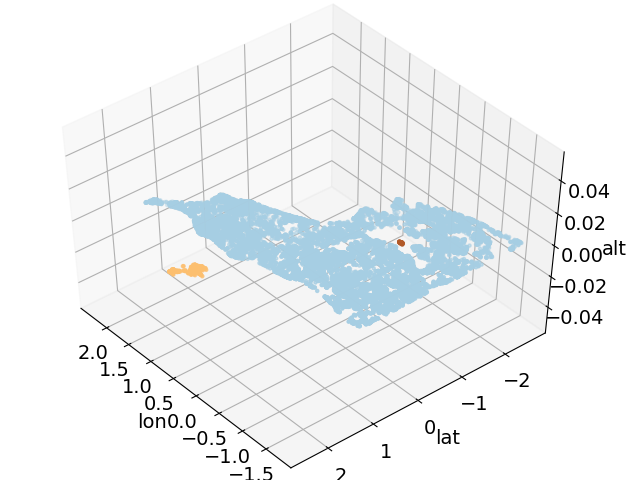

In [38]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


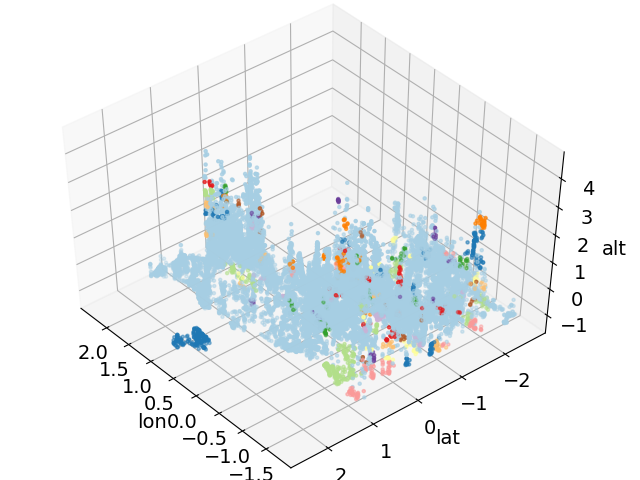

In [40]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.1)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


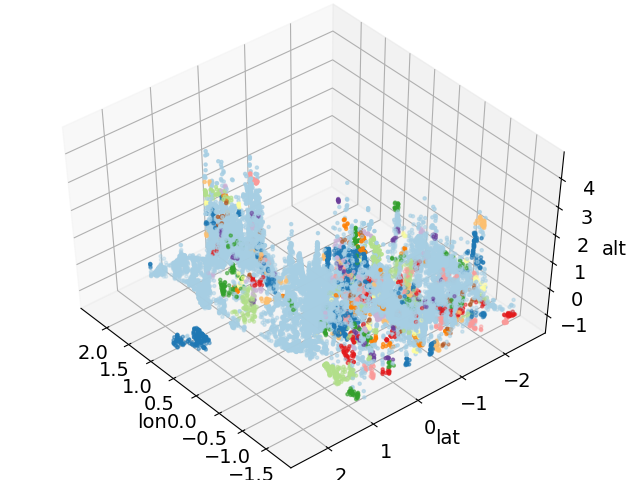

In [46]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [49]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.15)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


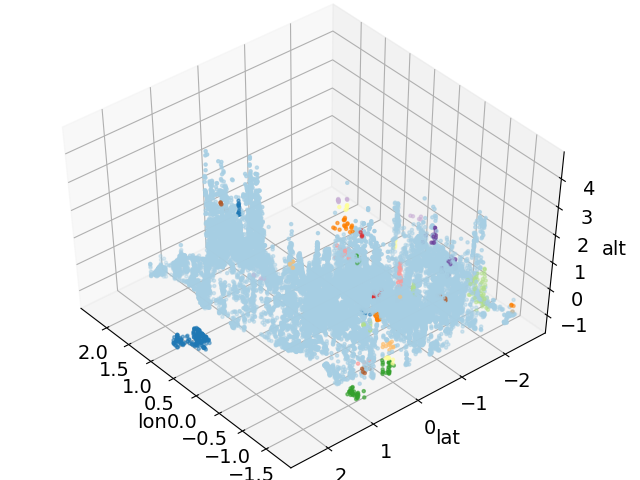

In [50]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.05)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


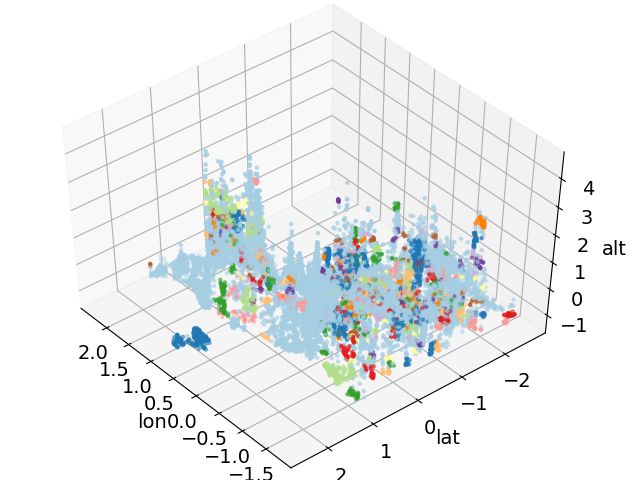

In [52]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.075)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


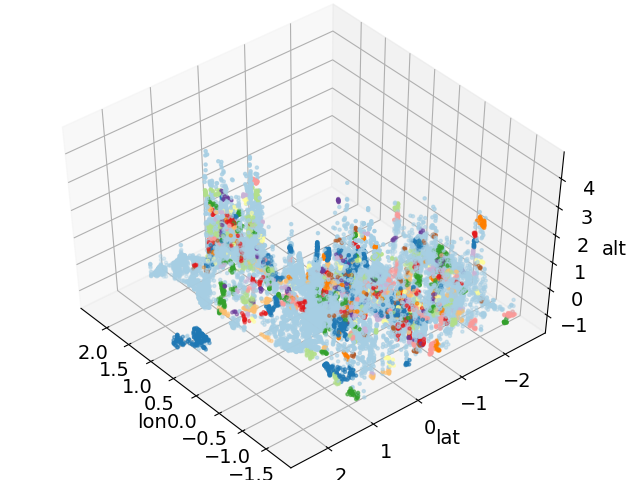

In [58]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

In [85]:
beer= pd.read_csv('../data/beers.csv')
beer= beer.drop(['nid'], axis=1).sample(500)
beer.head()

,abv,id,name,style,brewery_id,ounces
1650,0.065,583,Long Hammer IPA,American IPA,487,12.0
2126,0.075,122,Golden Frau Honey Wheat,Braggot,282,12.0
1354,0.056,1907,Montauk Summer Ale,American Blonde Ale,276,12.0
554,0.050,1219,All American Blonde Ale,American Blonde Ale,452,12.0
1507,0.053,2112,Atalanta,Saison / Farmhouse Ale,216,12.0


<IPython.core.display.Javascript object>


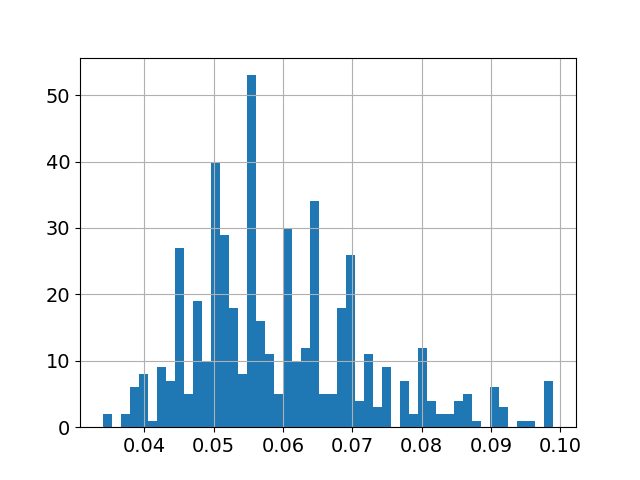

In [86]:
fig = plt.figure()
beer.abv.hist(bins=50)

In [87]:
Xbeer = beer.copy()
Xbeer['brewery_id'] = (beer.brewery_id - beer.brewery_id.mean())/beer.brewery_id.std()
Xbeer['id'] = (beer.id - beer.id.mean())/beer.id.std()
Xbeer['abv'] = (beer.abv - beer.abv.mean())/beer.abv.std()

<IPython.core.display.Javascript object>


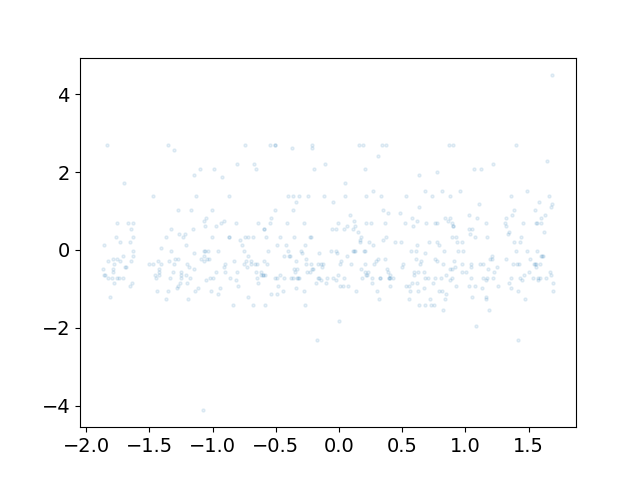

In [84]:
fig = plt.figure()
plt.scatter(Xbeer.id, Xbeer.abv, alpha=.1, s=5, )

In [88]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['id', 'abv']])
Xbeer.cluster.values_counts()

C:\Users\Erin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


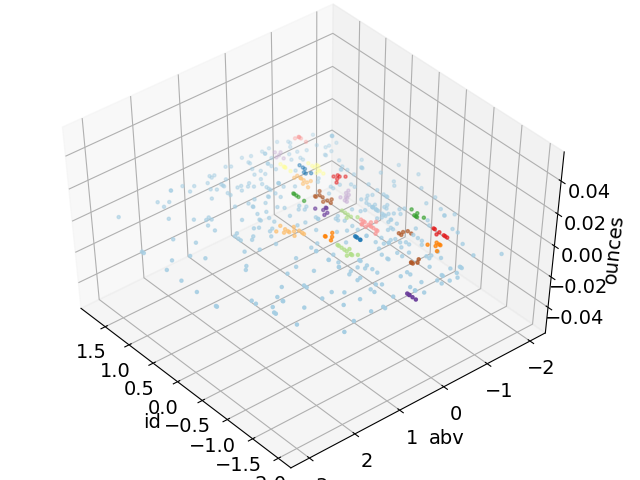

In [89]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [92]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['id', 'abv', 'ounces']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


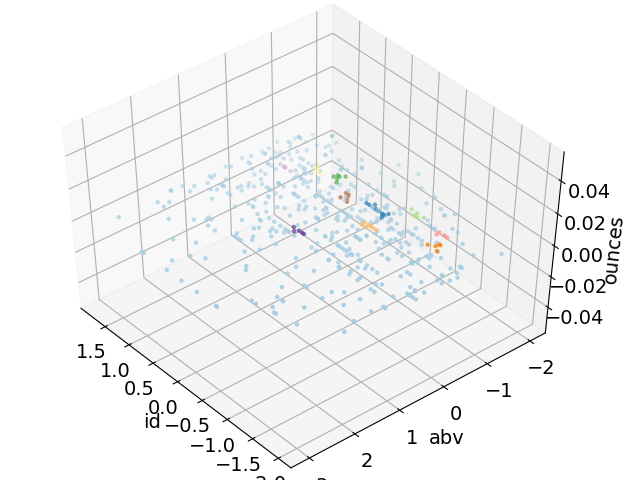

In [93]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [94]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.1)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['id', 'abv', 'ounces']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


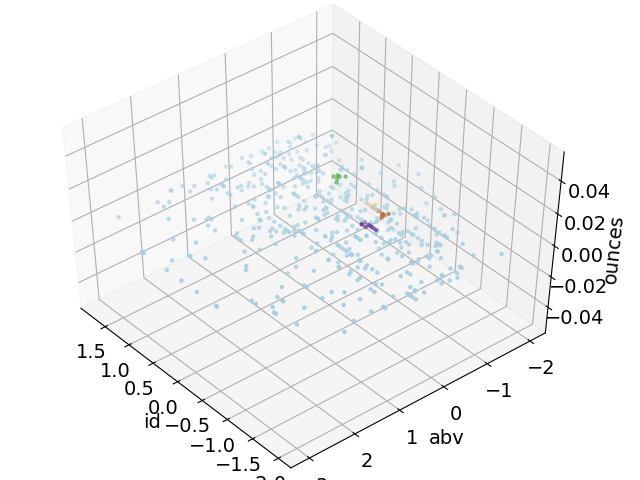

In [95]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [96]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.075)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['id', 'abv', 'ounces']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


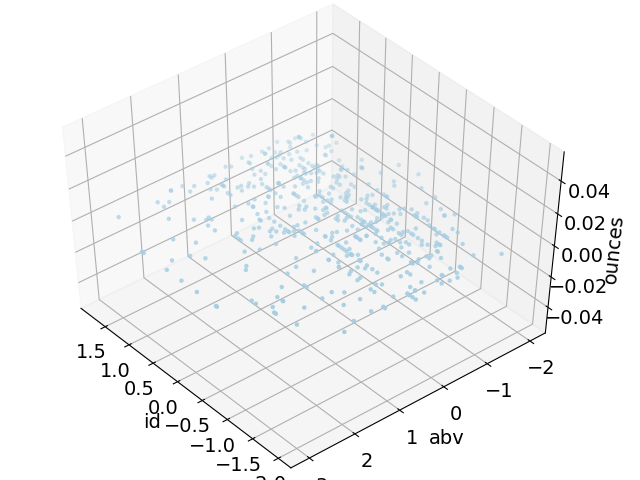

In [97]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [98]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.15)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['id', 'abv', 'ounces']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


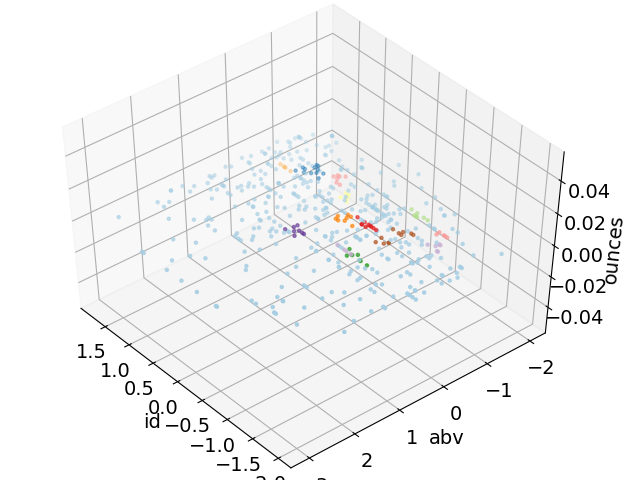

In [99]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [100]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['brewery_id', 'abv', 'ounces']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


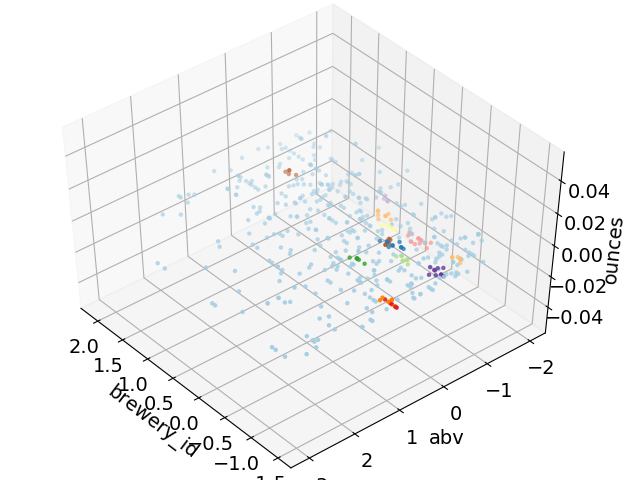

In [101]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['brewery_id'], Xbeer['abv'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('brewery_id')
ax.set_ylabel('abv')
ax.set_zlabel('ounces')
plt.show()

In [104]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.1)
Xbeer.cluster = dbscan.fit_predict(Xbeer[['brewery_id', 'ounces', 'abv']])
Xbeer.cluster.values_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values_counts'

<IPython.core.display.Javascript object>


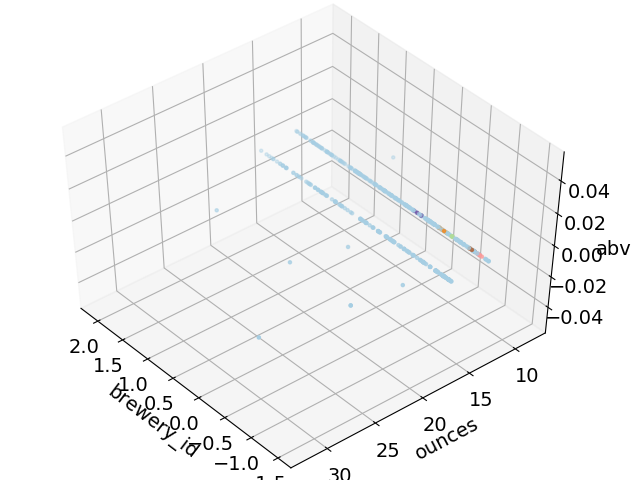

In [105]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(Xbeer['brewery_id'], Xbeer['ounces'], c=Xbeer.cluster, s=5, cmap='Paired')

ax.set_xlabel('brewery_id')
ax.set_ylabel('ounces')
ax.set_zlabel('abv')
plt.show()

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.